# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Part 2: Implement SVD for Dimensionality Reduction

In [19]:
def apply_svd_custom(X_train, X_test, n_components):
    n_components = int(n_components)
    
    # Center the data (mean normalization)
    X_train_centered = X_train - np.mean(X_train, axis=0)
    X_test_centered = X_test - np.mean(X_train, axis=0)  # Center test based on training mean

    # Compute the covariance matrix
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)
    
    # Perform eigen decomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top 'n_components' eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    # Project train and test data onto the new subspace
    X_train_svd = np.dot(X_train_centered, selected_eigenvectors)
    X_test_svd = np.dot(X_test_centered, selected_eigenvectors)
    
    return X_train_svd, X_test_svd, sorted_eigenvectors, sorted_eigenvalues


## Part 3: Train Logistic Regression and Measure Performance

In [10]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [52]:
svd_components = [5, 10, 50, 100, 200]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, sorted_eigenvectors, sorted_eigenvalues = apply_svd_custom(X_train, X_test, n_components) 
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append((n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

Training models with different levels of SVD preprocessing...
Applying custom SVD with 5 components...
SVD components: 5, Accuracy: 0.6796, Training time: 0.9488 seconds
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8035, Training time: 1.5240 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9080, Training time: 20.3412 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 76.3809 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 143.2636 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


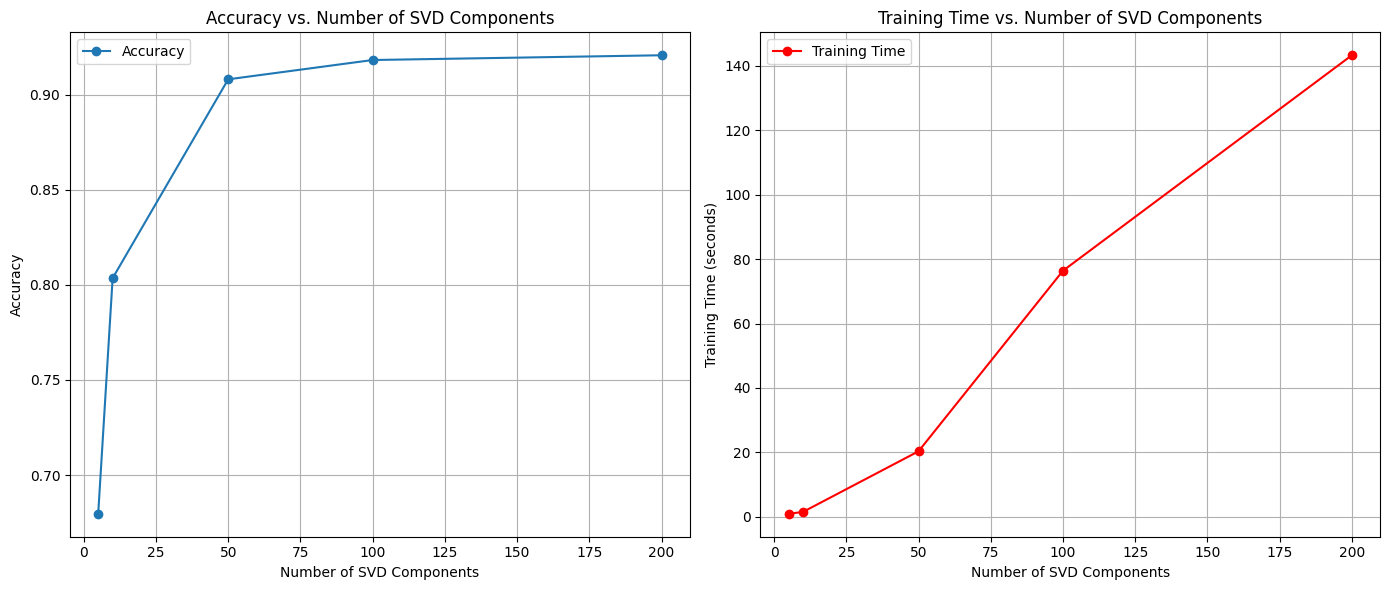

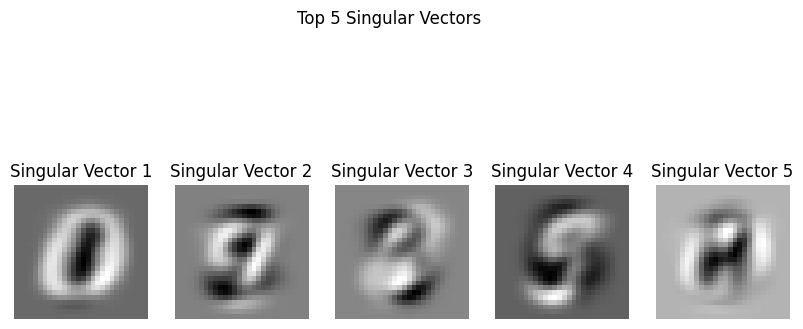

In [53]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
n_components_list = [n_components for n_components, _, _, in results ]
accuracies = [accuracy for _, accuracy, _ in results]
training_times = [training_time for _, _, training_time in results]

# Plot Accuracy and Training Time vs. Number of SVD Components
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(n_components_list, accuracies, marker='o', label='Accuracy')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of SVD Components')
plt.grid(True)
plt.legend()

# Plot Training Time
plt.subplot(1, 2, 2)
plt.plot(n_components_list, training_times, marker='o', color='red', label='Training Time')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of SVD Components')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Visualize Top 5 Singular Vectors
# Assuming you have 'sorted_eigenvectors' from the SVD function
top_singular_vectors = sorted_eigenvectors[:, :5]  # Get top 5 singular vectors

plt.figure(figsize=(10, 5))
for i in range(5):
    # Reshape each singular vector to 28x28 for visualization
    singular_vector_image = top_singular_vectors[:, i].reshape(28, 28)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(singular_vector_image, cmap='gray')
    plt.title(f'Singular Vector {i + 1}')
    plt.axis('off')

plt.suptitle('Top 5 Singular Vectors')
plt.show()

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

From the visualization of the different SVD options, we see a tradeoff between time and accuracy, which is especially prevalent at the two extremes of the number of components we chose. It makes sense that increasing the number of SVD components increases accuracy because it keeps more of the data as it was and compresses less. However, more SVD components will lead to a longer runtime because they have not compressed as much, so the model must chew through extra data. Additionally, we see that at some point (around 50 SVD components), the accuracy plateaus while the runtime continues to increase almost linearly. This suggests that there is a point at which the runtime cost of choosing more SVD components does not pay for the increase in accuracy. 


When we chose 5 components, it took very little time to run (0.9488 seconds), but the accuracy was quite low (0.6796). On the other hand, when we chose 200 components, the accuracy was high (0.9206), but it took a long time to run (143.2636 seconds). The visualization helps us see that at 50 components, the accuracy is still very high (0.9080), and the run time is pretty decent (20.3412 seconds), much lower than that for 200 components. If we were more concerned about runtime, running 10 components took much less time than 50 (1.5240 seconds) and did not sacrifice too much accuracy (0.8035). Overall, we see a tradeoff between accuracy and runtime when choosing the number of SVD components; specifically, more SVD components lead to a higher accuracy but longer runtime. However, at some point, increasing the number of components no longer provides sufficient gains in accuracy to justify the longer runtime. In these visualizations, we also see that between 10 and 50 components could be a sweet spot, and final decisions could be based on whether the user wants to prioritize accuracy or runtime. 